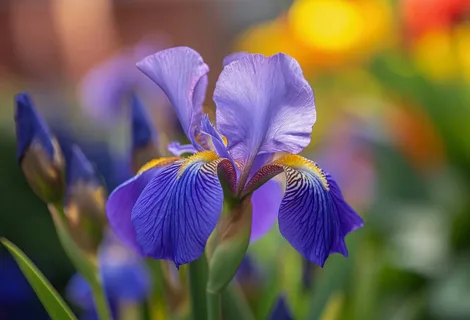

First of all, the Iris dataset is one of the most well-known and frequently used datasets in machine learning. It was first introduced by the British statistician and biologist Ronald A. Fisher in 1936. The dataset contains measurements of 150 iris flowers from three different species: Iris-setosa, Iris-versicolor, and Iris-virginica. Each flower is described by four features: the length and width of its sepals, and the length and width of its petals — all measured in centimeters.

Second of all, in a iris classification task, the goal is to build a machine learning model that can accurately identify the species of an iris flower based on these four features. Since there are three possible classes (one for each species), this is a multiclass classification problem.

The data is well-balanced, with 50 examples for each species. This makes it an excellent starting point for learning how to apply machine learning algorithms such as logistic regression, decision trees, support vector machines, k-nearest neighbors, or even neural networks.

To perform classification, we usually start by splitting the dataset into training and test sets. A machine learning algorithm is trained on the training set to learn patterns in the data, and then tested on the unseen test set to evaluate how well it can classify new flowers.

The Iris dataset is often used in educational settings because it’s simple, small, and easy to visualize. Many tools and libraries in Python, such as scikit-learn and seaborn, include built-in support for working with this dataset, allowing learners to quickly experiment with data preprocessing, model training, and evaluation techniques.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

In [ ]:
iris = load_iris()
data = pd.DataFrame(data = iris.data, columns = iris.feature_names)
data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
data.shape

(150, 5)

Using ".shape " we can learn size of our dataset (number of columns and rows)

In [ ]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [ ]:
data.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


Alternatively, we can use ".isna().sum() ", there is no difference between them.

As a result, we don't have any NULL values.

<Axes: >

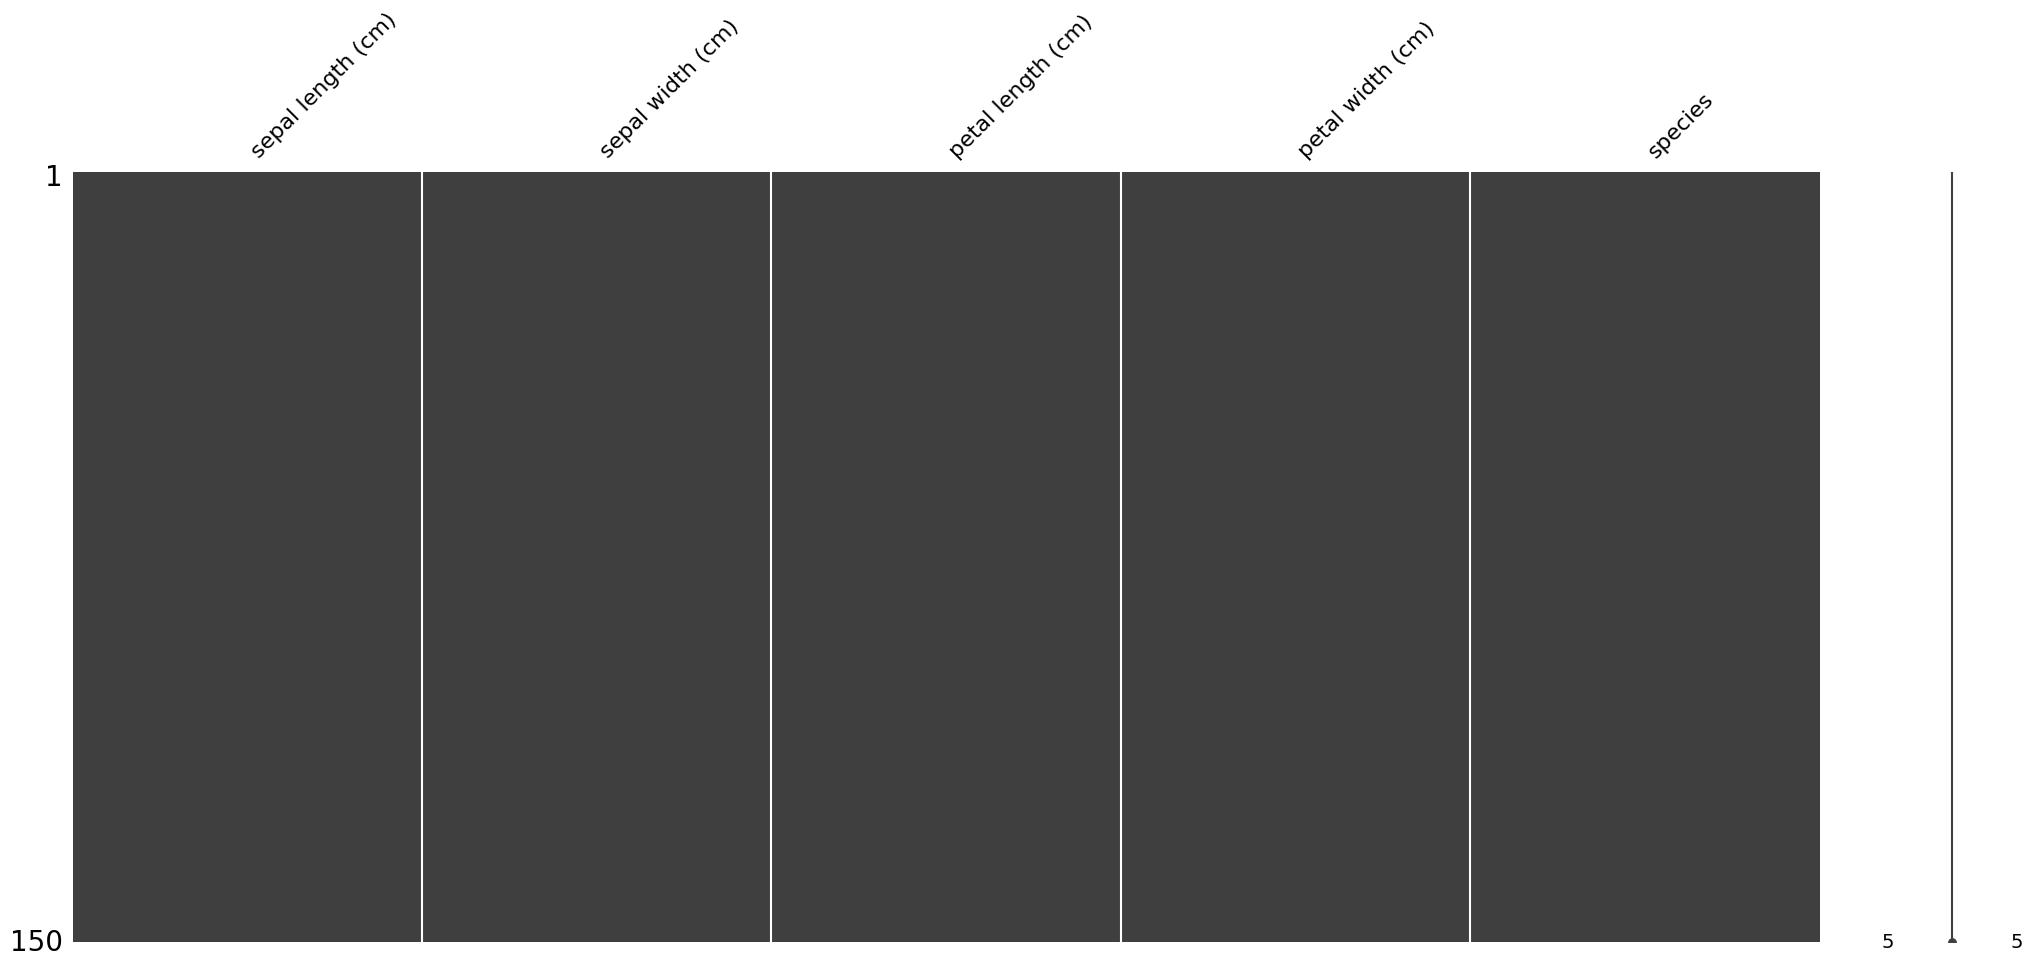

In [ ]:
ms.matrix(data)

missingo is a Python library used to quickly visualize and understand missing data patterns in a dataset through heatmaps, dendograms, bar charts, matrix plots, and so forth.

In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


when we run data.describe() we get a quick summary of the numerical columns in our dataset. It shows us important statistics like the total count of values in each column, the average or mean, the standard deviation which tells us how spread out the values are, the minimum and maximum values, and also the values at the 25th 50th and 75th percentiles. This helps us understand the overall distribution of the data and spot any unusual values or patterns before we build our model.

<Figure size 1000x800 with 0 Axes>

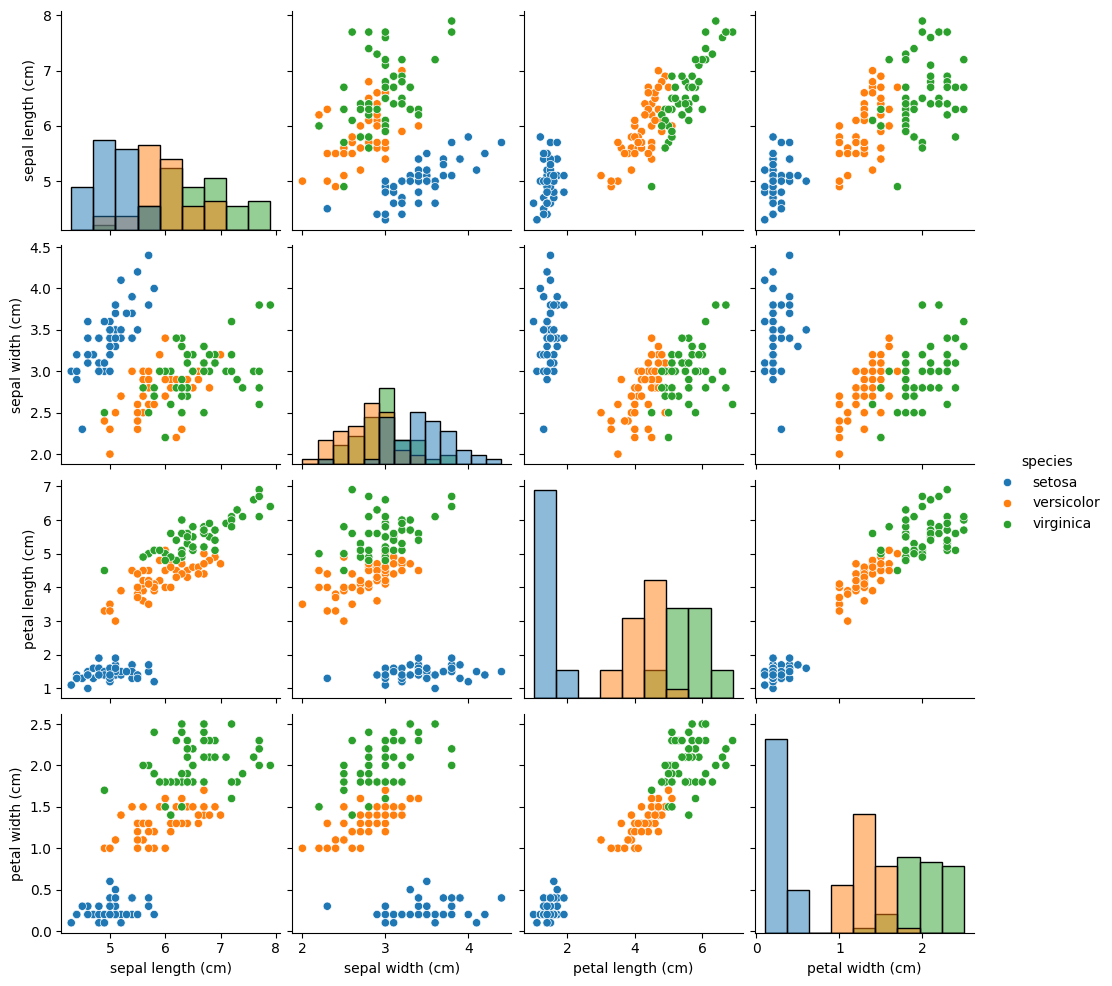

In [ ]:
plt.figure(figsize = (10, 8))
sns.pairplot(data, hue = 'species', diag_kind = 'hist')
plt.show()

The code snippet creates a pair plot using Seaborn to visualize the relationships between the features in the Iris dataset. The *plt.figure(figsize=(10, 8))* line sets the overall size of the figure, making it easier to view all the subplots clearly. Then, *sns.pairplot(data, hue='species', diag_kind='hist')* generates a grid of scatter plots for each pair of features in the dataset. Each point is colored according to its species, thanks to the *hue='species'* argument. This allows us to visually examine how well the species are separated in terms of their feature values. On the diagonal of the plot, instead of scatter plots, it shows histograms of each individual feature *(diag_kind='hist')*. Finally, *plt.show() *displays the plot.

This image (result of the code) is a visual representation of the Iris dataset, showing the relationships between all the features of the flowers: sepal length, sepal width, petal length, and petal width. Each point in the scatter plots represents a flower, and the colors indicate its species: blue for Setosa, orange for Versicolor, and green for Virginica.

The diagonal plots show the distribution (histograms) of each feature for the three species. For example, we can see that Setosa flowers have much smaller petal lengths and widths compared to the other two species.

The scatter plots below and above the diagonal show how two features relate to each other. These help us understand which feature pairs can be used to separate the species. For instance, the plot comparing petal length and petal width shows a clear separation between all three species, especially Setosa. This means that petal measurements are very useful for identifying the species.

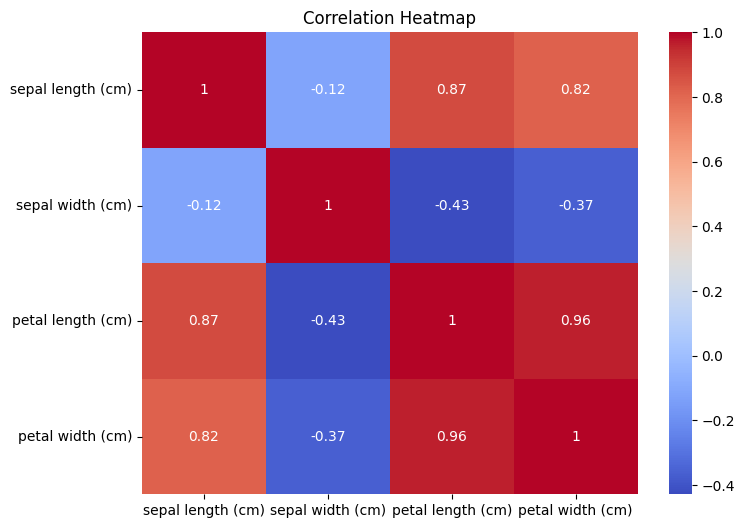

In [ ]:
plt.figure(figsize = (8, 6))
sns.heatmap(data.iloc[:, :-1].corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

This code generates a correlation heatmap that shows the relationship between the numerical features in the dataset.

The line *plt.figure(figsize=(8, 6))* sets the size of the overall figure, making it easier to view. Then, *sns.heatmap(data.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')* creates the heatmap using seaborn. The *.corr()* function calculates the correlation matrix for all numeric columns except the last one *(typically the species label)*. The *annot=True* argument displays the correlation values directly on the heatmap, and *cmap='coolwarm'* gives the plot a color gradient from cool colors (negative correlations) to warm colors (positive correlations). Finally, *plt.title()* adds a title, and *plt.show()* displays the plot.

### ***Correlation***

Correlation is a way of measuring how two variables move in relation to each other. If two things tend to increase or decrease together, we say they have a *positive correlation*. If one goes up while the other goes down, that’s a *negative correlation*. And if there’s no clear pattern, there may be *no correlation*.


- *The Pearson Correlation Coefficient*

The most common type of correlation is called the **Pearson correlation coefficient**, written as **r**. It tells us how strongly two variables are related in a **linear** way.

*Formula:* $r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2} \cdot \sqrt{\sum (y_i - \bar{y})^2}}$

In there,

* $x_i$ and $y_i$ are individual data points.
* $\bar{x}$ and $\bar{y}$ are the means of those values.

We are basically comparing how far each value is from its average, and seeing if they move together.

*Formula:* $r = \frac{\text{Covariance of } x \text{ and } y}{\text{Standard deviation of } x  \times \text{Standard deviation of } y}$

In addition,

* **r = 1** => perfect positive correlation
* **r = -1** => perfect negative correlation
* **r = 0** => no linear relationship


To be concluded that in machine learning and data science, correlation helps us understand which features are related. For example, if two features are very highly correlated, we might choose only one of them when training a model, because they give similar information. Furthermore, it is also useful to see if a feature is related to the target. A strong correlation might mean that feature will be helpful in prediction.

In [ ]:
#Our target column will be "species", however before creating X and y, let's count its values
print(data['species'].value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [ ]:
# Split data into features and target

y = data['species']
x = data.drop('species', axis = 1)

# split data into train/test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

* *Scaling*

Scaling in ML is all about getting your data to play nice together so your model doesn't trip over numbers that are on totally different scales like height in CMs say 180 and weight in KGs say 80 without scaling big numbers can bully smaller ones in algorithms like KNN, SVM or neural networks because they rely on distances or gradients scaling makes sure every feature gets an equal shot so your model learns better and faster its super important for stuff like gradient descent where big differences in scale can slow things down or mess up results plus it keeps things fair so no feature dominates just cause its numbers are bigger you dont always need scaling though like with decision trees or random forests since they don't care about scale but for most other models its a must.

Now, let's talk two big scaling methods **MinMaxScaler and Z-score** standardization a.k.a StandardScaler;

***MinMaxScaler*** takes your data and squashes it into a set range usually 0 to 1 it works by taking each value subtracting the smallest value in the feature and dividing by the range which is max minus min the formula is x scaled equals $X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$* so if the heights are 170, 180, 190 the "min is 170",  "max is 190",  "range is 20". Thus,

* 180 => 180 minus 170 divided by 20 which is *0.5*
* 170 => 170 minus 170 divided by 20 which is *0.0*
* 190 => 190 minus 170 divided by 20 which is *1.0*

Eventually, this puts everything between 0 and 1 keeping the relative distances between values its great for models that like bounded data like NNs but watch out for outliers cause a crazy high or low value can squish everything else.

On the other hand, * **Z-score standardization or StandardScaler** * is different it makes your data have a mean of 0 and a standard deviation of 1 basically centering it around zero with a consistent spread the formula is, ($X_{\text{scaled}} = \frac{X - \mu}{\sigma}$). This method assumes your data is kinda normal bell curve ish and works awesome for algorithms like linear regression or SVM but outliers can mess with the mean and standard deviation so if your data’s wild you might need something else like RobustScaler.

* Mean: $\mu = \frac{180 + 170 + 190}{3} = 180$
* Std: $\sigma = \sqrt{\frac{(180-180)^2 + (170-180)^2 + (190-180)^2}{3}} = \sqrt{\frac{0 + 100 + 100}{3}} \approx 8$

Then;
* Z(180) => 180 minus 180 divided by 8 which is *0.0*
* Z(170) => 170 minus 180 divided by 8 which is *-1.2*
* Z(190) => 190 minus 180 divided by 8 which is *1.2*

Key points always scale after splitting your data into training and test sets to avoid data leakage where test info sneaks into training only fit your scaler on training data then use it to transform both training and test data MinMax is good for bounded ranges Z-score is better for normally distributed data if you got outliers RobustScaler might be your friend since it uses medians instead of means you can also reverse scaling to get back to original values which is handy for interpreting results.

In [ ]:
# Build a model

model = RandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(x_train, y_train)
pred = model.predict(x_test)

*RandomForestClassifier* is a machine learning algorithm that's used for classification tasks. The idea behind it is pretty simple: instead of relying on a single decision tree to make predictions, it builds a large number of trees and lets them vote on the final answer. Each of these trees is trained on a random part of the dataset, and at each point where the tree splits, it only looks at a random selection of features. This randomness helps make the model more accurate and less likely to overfit — which means it doesn't just memorize the training data, but actually learns patterns that generalize well to new data.

When you use *RandomForestClassifier* in Python, you are basically telling the computer, “Don’t trust one model, ask many models and go with the majority.” That’s what makes it an ensemble method — it combines the predictions of many smaller models to make a stronger one. It's especially good when the data is noisy or when a single decision tree is not reliable on its own. In most cases, it gives good accuracy without needing a lot of tuning.

You can also control how many trees are created, how deep they grow, and how random the selection of data and features should be. The more trees you use, the more stable your predictions become, but it may take a bit more time to train.

In a nutshell, RandomForestClassifier is a reliable, easy-to-use tool that often works well out of the box and is widely used in real-world machine learning problems.


Accuracy: 100.0

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



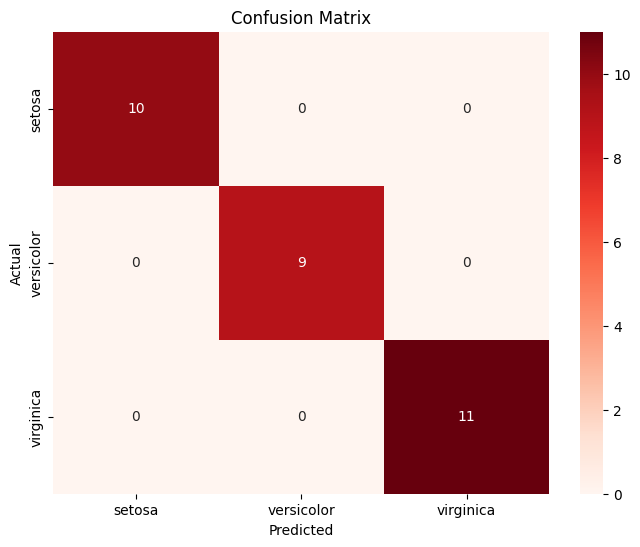

In [ ]:
# Accuracy

acc = accuracy_score(y_test, pred)
print(f"\nAccuracy: {round(acc * 100, 2)}")

# Classification Report

print("\nClassification Report:")
print(classification_report(y_test, pred))

# Confusion Matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize = (8, 6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Reds', xticklabels = iris.target_names, yticklabels = iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- ***Accuracy Score***

It measures the proportion of correctly predicted samples out of all samples.

*Formula:* $\text{accuracy} = \frac{\text{number of correct predictions}}{\text{total number of predictions}} = \frac{TP + TN}{TP + TN + FP + FN}$

- ***Classification Report***

It is a detailed summary of the main classification metrics calculated for each class. It typically includes: *Precision*, *Recall*, *F1-score*, *Support*.

* *Precision:*

  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$

  How many predicted positives are actually positive?
  High precision = fewer false positives.

* *Recall (Sensitivity):*

  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

  How many actual positives are correctly identified?
  High recall = fewer false negatives.

* *F1-score:*
  Harmonic mean of precision and recall:

  $$
  F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

  Balances precision and recall in one number.

* *Support:*
  Number of true instances for each class in the dataset.



- ***Confusion Matrix***

It is a table that summarizes the performance of a classification model by showing the counts of: True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN). Shortly, It compares the actual class labels with the predicted labels.

In [ ]:
#FINALLY

***IN CONCLUSION, I WOULD LIKE TO EXPRESS MY SINCERE GRATITUDE FOR YOUR TIME AND CONSIDERATION***

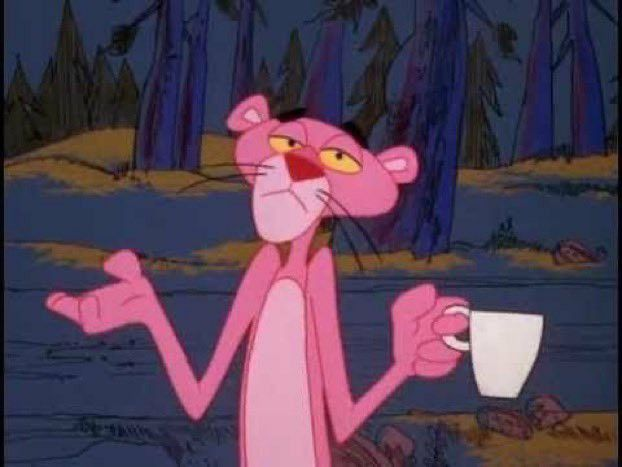